In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import math 
from sklearn.metrics import mean_squared_error

In [65]:
x_train = np.load("./data/x_train.npy")
y_train = np.load("./data/y_train.npy")
x_test = np.load("./data/x_test.npy")
y_test = np.load("./data/y_test.npy")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1174, 69, 1)
(1174,)
(241, 69, 1)
(241,)


In [66]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(69,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 69, 50)            10400     
                                                                 
 lstm_10 (LSTM)              (None, 69, 50)            20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=25,batch_size=32,verbose=1)

Epoch 1/25
 7/37 [====>.........................] - ETA: 1s - loss: 0.0052

KeyboardInterrupt: 

In [ ]:
#needed to do here again, purely so can do scaler inverse 
#transform, to be able to calculuse RMSE
df = pd.read_csv('./data/ETH-CAD.csv')
df_close = df.reset_index()['Close']
scaler = MinMaxScaler(feature_range=(0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))



In [ ]:
train_predict = model.predict(x_train)
train_predict = scaler.inverse_transform(train_predict)
test_predict = model.predict(x_test)
test_predict = scaler.inverse_transform(test_predict)


In [ ]:
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

710.0964946775733
3924.927930587252


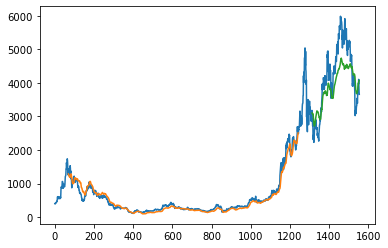

In [73]:
look_back=69
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [74]:
training_size = int(len(df_close)*0.8)
test_size = int(len(df_close)) - training_size
train_data, test_data = df_close[0:training_size:],df_close[training_size:len(df_close),:1]
print(len(test_data))

311


In [75]:
x_input=test_data[242:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input


[0.9277710344540105,
 0.9096786768951421,
 0.9369076426062453,
 0.8718762069374335,
 0.8274295883940274,
 0.8655442392708429,
 0.8760479267648268,
 0.8058446457255876,
 0.8011593570211055,
 0.8588776495617712,
 0.8428253553331434,
 0.8323488465254586,
 0.8502104761567588,
 0.8420884557788466,
 0.8470412923577613,
 0.8651171099800719,
 0.851958555851281,
 0.8777598512215684,
 0.863263557209955,
 0.873138644217608,
 0.8681109207132749,
 0.8596986617950422,
 0.8100055604983035,
 0.7703595947082733,
 0.7866083731972422,
 0.7731729622028851,
 0.7919062211960851,
 0.8060368081002337,
 0.7972460423819472,
 0.8013299925239752,
 0.751978660977564,
 0.7215721168981478,
 0.6679476649621496,
 0.6462088759294717,
 0.6606305323879607,
 0.6455296583145119,
 0.6740708472501783,
 0.6985098839089995,
 0.6724173943833345,
 0.6877214437247214,
 0.6921059383767194,
 0.6961769225212229,
 0.6651806342441507,
 0.6539084633862984,
 0.6400879378218683,
 0.6194384154800967,
 0.5285405637176216,
 0.49583106258865

In [76]:
lst_output=[]
n_steps=69
i=0
while(i<30):
    
    if(len(temp_input)>69):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.3002228]
70
1 day input [0.90967868 0.93690764 0.87187621 0.82742959 0.86554424 0.87604793
 0.80584465 0.80115936 0.85887765 0.84282536 0.83234885 0.85021048
 0.84208846 0.84704129 0.86511711 0.85195856 0.87775985 0.86326356
 0.87313864 0.86811092 0.85969866 0.81000556 0.77035959 0.78660837
 0.77317296 0.79190622 0.80603681 0.79724604 0.80132999 0.75197866
 0.72157212 0.66794766 0.64620888 0.66063053 0.64552966 0.67407085
 0.69850988 0.67241739 0.68772144 0.69210594 0.69617692 0.66518063
 0.65390846 0.64008794 0.61943842 0.52854056 0.49583106 0.52285394
 0.50527665 0.50825238 0.51250951 0.506541   0.53436179 0.54522686
 0.54627395 0.56275707 0.58393533 0.56018341 0.55902137 0.62913788
 0.63538731 0.64416952 0.65833992 0.65617456 0.6798097  0.64786536
 0.61523295 0.60376417 0.30022281]
1 day output [[0.29480705]]
2 day input [0.93690764 0.87187621 0.82742959 0.86554424 0.87604793 0.80584465
 0.80115936 0.85887765 0.84282536 0.83234885 0.85021048 0.84208846
 0.84704129 0.86511711 0.85

In [80]:
print(len(df_close))

1555


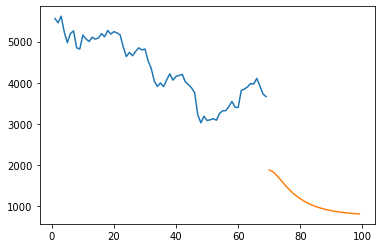

In [83]:
day_new=np.arange(1,70)
day_pred=np.arange(70,100)
plt.plot(day_new,scaler.inverse_transform(df_close[1486:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

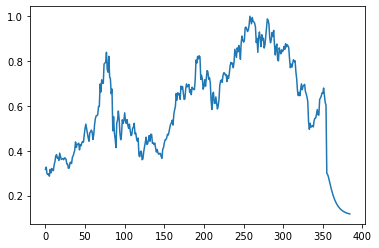

In [84]:
df_new=df_close.tolist()
df_new.extend(lst_output)
plt.plot(df_new[1200:])

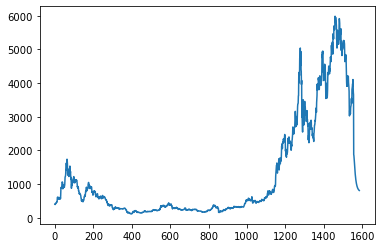

In [85]:
df_new=scaler.inverse_transform(df_new).tolist()
plt.plot(df_new)